<a href="https://colab.research.google.com/github/Rifat429/DL/blob/main/HSV_image_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

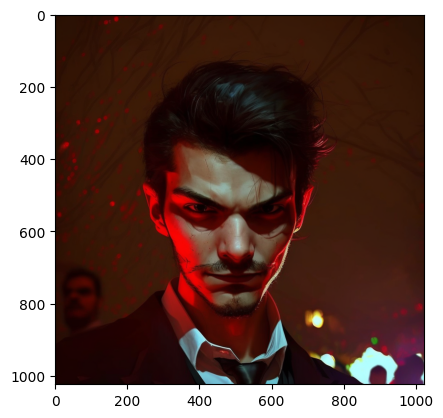

In [25]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage import io, measure

img= io.imread('/content/DRACULA_use_this_image_make_his_eyes_red_give_him_a_serious_moo_2cd152b1-7ba8-4e9e-83eb-76ef9b3b3ce2.png')
plt.imshow(img)

In [34]:
hsv=cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
mask=cv2.inRange(hsv,(5,50,50),(40,150,100))

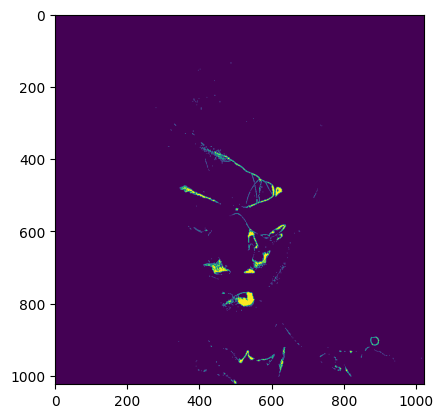

In [35]:
plt.imshow(mask)

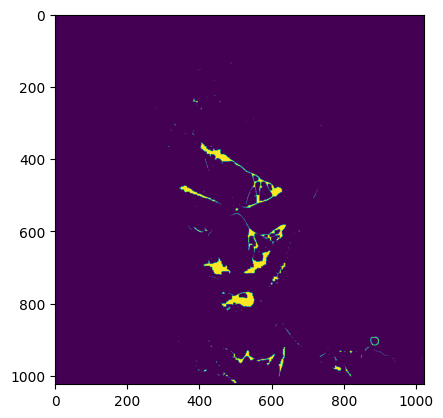

In [36]:
from scipy import ndimage as nd
close_mask= nd.binary_closing(mask,np.ones((7,7)))
plt.imshow(close_mask)

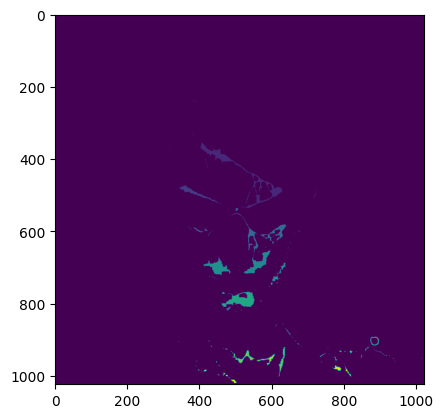

In [37]:
label_image= measure.label(close_mask)
plt.imshow(label_image)

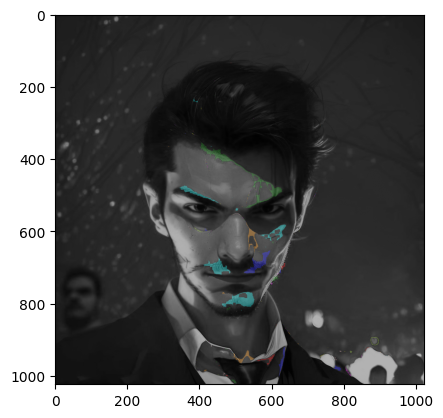

In [38]:
from skimage.color import label2rgb
image_label_overlay=label2rgb(label_image, image=img)
plt.imshow(image_label_overlay)

In [41]:
props= measure.regionprops_table(label_image,img,
                                 properties=['Label','area','equivalent_diameter','mean_intensity','solidity'])

import pandas as pd
df = pd.DataFrame(props)
df

,Label,area,equivalent_diameter,mean_intensity-0,mean_intensity-1,mean_intensity-2,solidity
0,1,2,1.595769,51.000000,26.500000,21.000000,1.000000
1,2,1,1.128379,51.000000,31.000000,22.000000,1.000000
2,3,1,1.128379,50.000000,28.000000,21.000000,1.000000
3,4,1,1.128379,50.000000,44.000000,40.000000,1.000000
4,5,2,1.595769,54.500000,46.500000,43.000000,1.000000
...,...,...,...,...,...,...,...
210,211,16,4.513517,58.812500,28.312500,21.750000,0.842105
211,212,1,1.128379,53.000000,40.000000,29.000000,1.000000
212,213,1,1.128379,51.000000,30.000000,25.000000,1.000000
213,214,2,1.595769,56.000000,31.500000,25.500000,1.000000
